In [5]:
# import needed libraries
import os
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))

from pathlib import Path

from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
start_year = 2012 # 2013
end_year = 2019 # 2020
delta = date(end_year+1, 1, 1) - date(start_year, 1, 1)
num_days = delta.days
print(num_days)

2922


In [7]:
df_mrc_station = pd.read_csv(f'{BASE_DIR}/data/mrc_list.csv')
len(df_mrc_station)

3662

In [4]:
df_mrc_station.head()

,rid,uniqueid,identifier,locationidentifier,country,countrycode,stationname,stationcode,parameter,label,...,interval,utcoffset,correctedstarttime,starttime,correctedendtime,endtime,river,stationshortname,latitude,longitude
0,1471,a43c0d32180141c3a22722b3c0b1610a,Discharge.Daily Calculated@KH_580103_[Bac Trak...,KH_580103_[Bac Trakoun],Cambodia,KH,Bac Trakoun,580103,Discharge,Daily Calculated,...,Daily,7,1994-09-14 00:00:00,19940914,2002-12-31 00:00:00,20021231,Pursat,NaN,12.355927,103.748306
1,1512,9e7c79e059b547e392df91cde0b8c2db,Air Temperature.Daily Maximum@VN_120712_[Dak N...,VN_120712_[Dak Nong],Viet Nam,VN,Dak Nong,120712,Air Temperature,Daily Maximum,...,Daily,7,1980-01-01 00:00:00,19800101,2012-12-31 00:00:00,20121231,close to Srepok,NaN,12.000833,107.687778
2,18,c061141e0ff2458f8256d2fd04a565fa,Rainfall.Telemetry@CN_092980_[Manan],CN_092980_[Manan],China,CN,Manan,092980,Rainfall,Telemetry,...,15 minutes,8,2010-07-30 05:30:00,20100730,2021-03-19 00:00:00,20210319,Manan,NaN,21.910000,101.260002
3,28,2c070f6a900b41e7ad19bafef374f52d,Water Level.Telemetry@KH_033401_[Chaktomuk],KH_033401_[Chaktomuk],Cambodia,KH,Chaktomuk,033401,Water Level,Telemetry,...,15 minutes,7,2008-08-01 14:15:00,20080801,2021-03-19 05:30:00,20210319,Bassac,NaN,11.562990,104.935287
4,4,f3b84c6e2bcf42278389c8117f1cb5e5,Rainfall.Telemetry@KH_530101_[Sisophon],KH_530101_[Sisophon],Cambodia,KH,Sisophon,530101,Rainfall,Telemetry,...,15 minutes,7,2010-07-18 08:30:00,20100718,2021-03-19 05:30:00,20210319,Stung Mongkolborey,NaN,13.586650,102.976608


In [5]:
parameters = df_mrc_station['parameter'].unique()

In [6]:
parameters

array(['Discharge', 'Air Temperature', 'Rainfall', 'Water Level',
       'Nitrite-Nitrate', 'Sediment Concentration', 'Relative Humidity',
       'Sulphate calculated by EC', 'Water Temperature', 'Ammonium',
       'Sediment Flux', 'Evaporation Rate', 'Total phosphorous',
       'Conductivity', 'Dissolved Oxygen', 'Total Suspended Solids', 'pH',
       'Chemical Oxygen Demand', 'Wind Speed', 'Sunshine Duration',
       'Littoral AAbundance', 'Total Nitrogen', 'Diatoms ARichness',
       'Littoral ARichness', 'Zooplanktons AAbundance', 'Bentho ATSPT',
       'Littoral ATSPT', 'Zooplanktons ATSPT', 'Diatoms AAbundance',
       'Bentho AAbundance', 'Bentho ARichness', 'Zooplanktons ARichness',
       'Diatoms ATSPT'], dtype=object)

In [7]:
discharge_stations =  df_mrc_station[(df_mrc_station['parameter']=='Discharge') & (df_mrc_station['country']=='Cambodia')]['stationcode'].unique()


In [8]:
discharge_lists = discharge_stations.tolist()
len(discharge_lists)

45

In [11]:
_level_stations =  df_mrc_station.loc[(df_mrc_station['parameter']=='Water Level') & (df_mrc_station['country']=='Cambodia')]['stationcode'].unique()


In [12]:
level_lists = _level_stations.tolist()
len(level_lists)

91

In [13]:
cstations = [station for station in level_lists if station in discharge_lists]
len(cstations)

42

In [14]:
discharge_only = [station for station in discharge_lists if station not in level_lists]
len(discharge_only)

3

In [15]:
discharge_o_df = df_mrc_station[df_mrc_station.stationcode.isin(discharge_only) & (df_mrc_station['parameter']=='Discharge') & (df_mrc_station['country']=='Cambodia')]


In [16]:
dfed = df_mrc_station.loc[df_mrc_station.stationcode.isin(level_lists) & (df_mrc_station['parameter']=='Water Level') & (df_mrc_station['country']=='Cambodia')]
dfed

,rid,uniqueid,identifier,locationidentifier,country,countrycode,stationname,stationcode,parameter,label,...,interval,utcoffset,correctedstarttime,starttime,correctedendtime,endtime,river,stationshortname,latitude,longitude
3,28,2c070f6a900b41e7ad19bafef374f52d,Water Level.Telemetry@KH_033401_[Chaktomuk],KH_033401_[Chaktomuk],Cambodia,KH,Chaktomuk,033401,Water Level,Telemetry,...,15 minutes,7,2008-08-01 14:15:00,20080801,2021-03-19 05:30:00,20210319,Bassac,NaN,11.562990,104.935287
19,149,48f3d542b23f474f82a28c825363a681,Water Level.Manual@KH_100001_[Tuk Chhoo],KH_100001_[Tuk Chhoo],Cambodia,KH,Tuk Chhoo,100001,Water Level,Manual,...,1-6 times p/day,7,2001-01-01 00:00:00,20010101,2005-12-31 00:00:00,20051231,Kamchay,NaN,10.685081,105.126151
22,154,677779f7a46a4c12bc771150d7831fa5,Water Level.Manual@KH_580301_[Prey Klong(down)],KH_580301_[Prey Klong(down)],Cambodia,KH,Prey Klong(down),580301,Water Level,Manual,...,1-6 times p/day,7,1994-04-01 00:00:00,19940401,2008-12-31 00:00:00,20081231,Stung Pursat,NaN,12.112950,103.910288
37,171,93337ffe7838467289bf5b55401ee6f8,Water Level.Manual@KH_450101_[Lumphat],KH_450101_[Lumphat],Cambodia,KH,Lumphat,450101,Water Level,Manual,...,1-6 times p/day,7,1965-01-01 00:00:00,19650101,2021-03-15 00:00:00,20210315,Sre Pok,NaN,13.500880,106.971153
40,179,b5da800e9c8e4346a3b8d9d6daa73e0a,Water Level.Manual@KH_019802_[Kompong Cham],KH_019802_[Kompong Cham],Cambodia,KH,Kompong Cham,019802,Water Level,Manual,...,1-6 times p/day,7,1930-01-01 00:00:00,19300101,2021-03-15 00:00:00,20210315,Mekong,NaN,11.910986,105.384102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,1416,280aadb168a84e2fb78d8921eb82f299,Water Level.Manual@KH_583010_[Tlea Maam (1)],KH_583010_[Tlea Maam (1)],Cambodia,KH,Tlea Maam (1),583010,Water Level,Manual,...,1-6 times p/day,7,1994-04-14 00:00:00,19940414,1997-02-28 00:00:00,19970228,Pursat,NaN,12.097937,102.872423
2784,1428,c00267c4e69e4ea7808dcdb9dc49dfc4,Water Level.Manual@KH_014902_[Sambor],KH_014902_[Sambor],Cambodia,KH,Sambor,014902,Water Level,Manual,...,1-6 times p/day,7,1924-01-01 00:00:00,19240101,2002-12-31 00:00:00,20021231,NaN,NaN,NaN,NaN
2785,1429,4d2c4faec53645cab14bb33cca61f14d,Water Level.Manual@KH_580302_[Prey Klong(up)],KH_580302_[Prey Klong(up)],Cambodia,KH,Prey Klong(up),580302,Water Level,Manual,...,1-6 times p/day,7,1994-09-02 00:00:00,19940902,2001-12-31 00:00:00,20011231,Stung Santre,NaN,12.506908,103.210374
3020,1656,6955b9585cc94524bcff184034e4afd3,Water Level.Telemetry@KH_450101_[Lumphat],KH_450101_[Lumphat],Cambodia,KH,Lumphat,450101,Water Level,Telemetry,...,15 minutes,7,2009-04-01 16:15:00,20090401,2021-03-19 05:15:00,20210319,Sre Pok,NaN,13.500880,106.971153


In [17]:
level_stations = df_mrc_station.loc[df_mrc_station.uniqueid.isin(dfed.uniqueid.unique())]['uniqueid'].unique()
len(level_stations)

104

In [18]:
df_level = []
for _station in level_stations:
    try:
        df_h = pd.read_csv(f'{BASE_DIR}/data/historical_data/{_station}.csv')
        df_h['datetime'] = pd.to_datetime(df_h['datetime'])
        df_h['uniqueid'] = _station
        df_level.append(df_h)
    except:
        print(f'No file exists for {_station}')


No file exists for 85cc0f481764449c8d6aeab626793a0b


In [19]:
len(df_level)

103

In [20]:
single_df_level = pd.concat(df_level)

In [21]:
len(single_df_level)

4429976

In [22]:
level_obs = single_df_level.loc[(single_df_level['datetime'] >= f'{start_year}-01-01 00:00:00') & (single_df_level['datetime'] < f'{end_year+1}-01-01 00:00:00')].sort_values(by=['datetime'], ascending=True)


In [23]:
len(level_obs)

2595396

In [24]:
level_obs.tail(5)

,datetime,value,uniqueid
283112,2019-12-31 23:45:00,5.773,8456239a6baf4221a744886c8cb6efd3
53904,2019-12-31 23:45:00,0.782,7be67bafcf9d4233b5ca883857273e1a
267883,2019-12-31 23:45:00,1.613,5a7037f272c745d5bcafcc16a5c2f89c
270751,2019-12-31 23:45:00,2.869,0a723f8802e44a6bb12c08dcf1816a83
251855,2019-12-31 23:45:00,3.354,f08efea6bd684203ab33c5a316e2459a


In [25]:
all_stations = df_mrc_station[df_mrc_station['uniqueid'].isin(level_obs['uniqueid'].unique())]

In [26]:
all_stations.head()

,rid,uniqueid,identifier,locationidentifier,country,countrycode,stationname,stationcode,parameter,label,...,interval,utcoffset,correctedstarttime,starttime,correctedendtime,endtime,river,stationshortname,latitude,longitude
3,28,2c070f6a900b41e7ad19bafef374f52d,Water Level.Telemetry@KH_033401_[Chaktomuk],KH_033401_[Chaktomuk],Cambodia,KH,Chaktomuk,033401,Water Level,Telemetry,...,15 minutes,7,2008-08-01 14:15:00,20080801,2021-03-19 05:30:00,20210319,Bassac,NaN,11.562990,104.935287
37,171,93337ffe7838467289bf5b55401ee6f8,Water Level.Manual@KH_450101_[Lumphat],KH_450101_[Lumphat],Cambodia,KH,Lumphat,450101,Water Level,Manual,...,1-6 times p/day,7,1965-01-01 00:00:00,19650101,2021-03-15 00:00:00,20210315,Sre Pok,NaN,13.500880,106.971153
40,179,b5da800e9c8e4346a3b8d9d6daa73e0a,Water Level.Manual@KH_019802_[Kompong Cham],KH_019802_[Kompong Cham],Cambodia,KH,Kompong Cham,019802,Water Level,Manual,...,1-6 times p/day,7,1930-01-01 00:00:00,19300101,2021-03-15 00:00:00,20210315,Mekong,NaN,11.910986,105.384102
131,53,9819df92c2264effa3b5a416e49eb1df,Water Level.Telemetry@KH_019905_[Kampong Ampil],KH_019905_[Kampong Ampil],Cambodia,KH,Kampong Ampil,019905,Water Level,Telemetry,...,15 minutes,7,2018-06-01 04:15:00,20180601,2021-03-19 05:45:00,20210319,Tonle Toch,KPA,11.657850,105.131866
140,41,7be67bafcf9d4233b5ca883857273e1a,Water Level.Telemetry@KH_680103_[Angkorborey],KH_680103_[Angkorborey],Cambodia,KH,Angkorborey,680103,Water Level,Telemetry,...,15 minutes,7,2018-06-02 06:30:00,20180602,2021-02-20 01:30:00,20210220,Stung Angkor Borey,AKB,10.993950,104.976540


In [27]:
len(all_stations)

50

In [28]:
all_stations_list = all_stations['uniqueid'].unique()
len(all_stations_list)

50

/Users/biplovbhandari/miniconda3/envs/bias/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


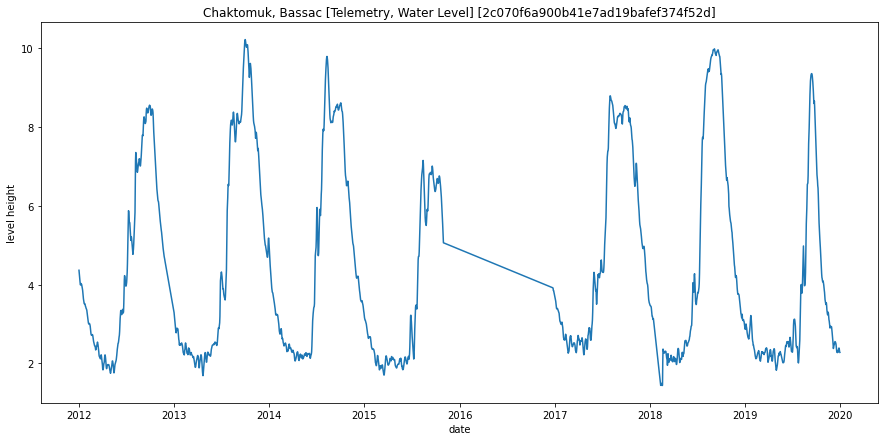

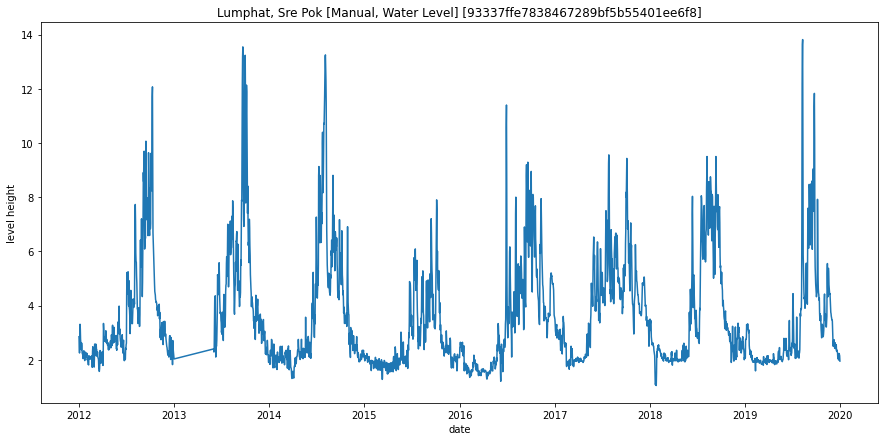

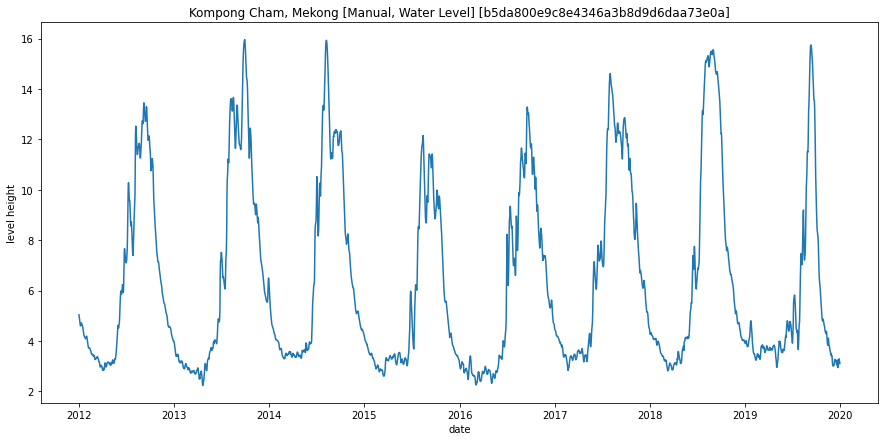

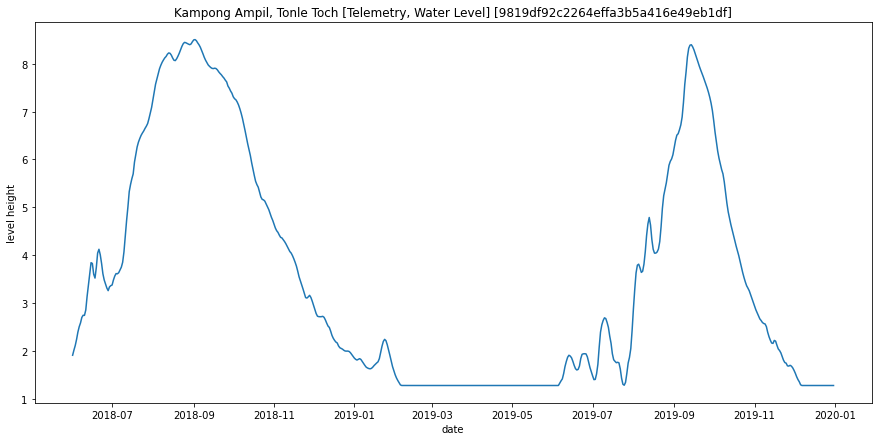

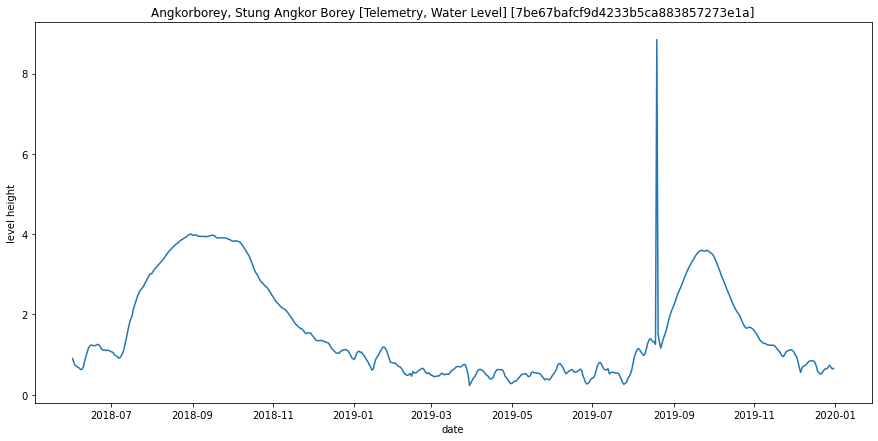

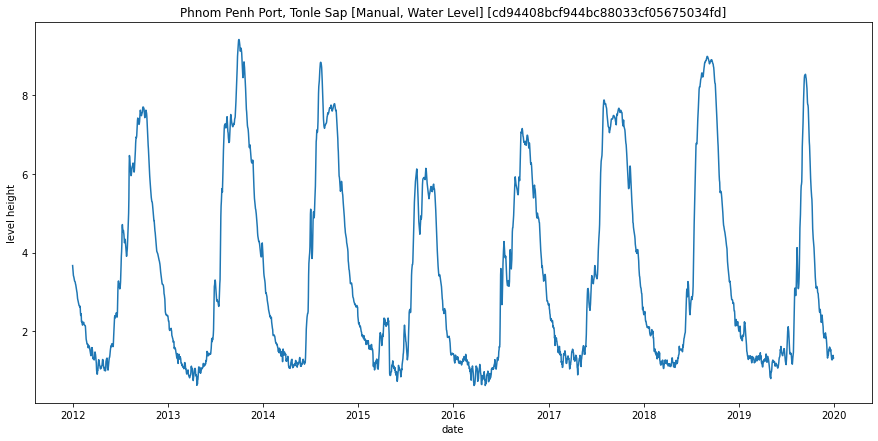

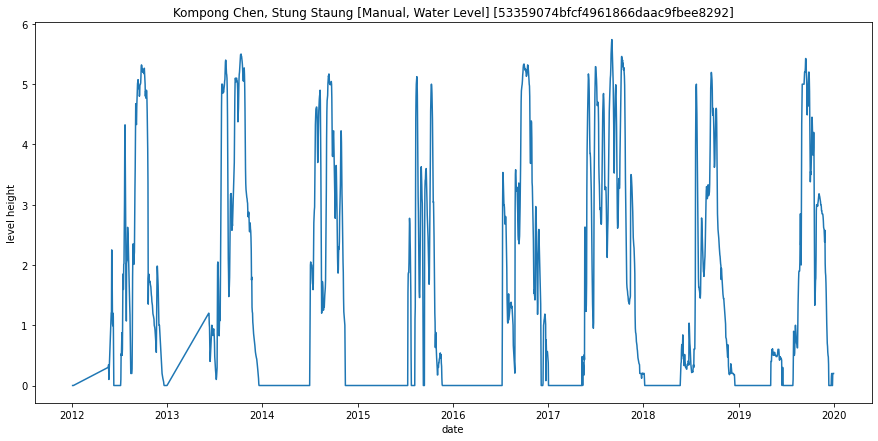

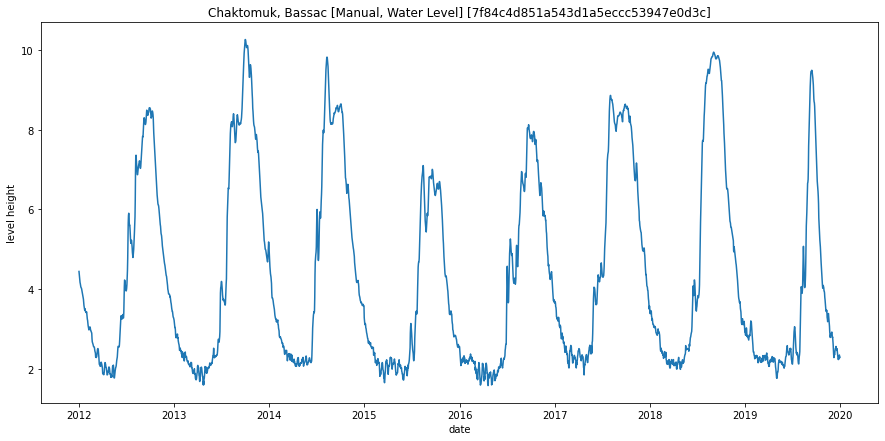

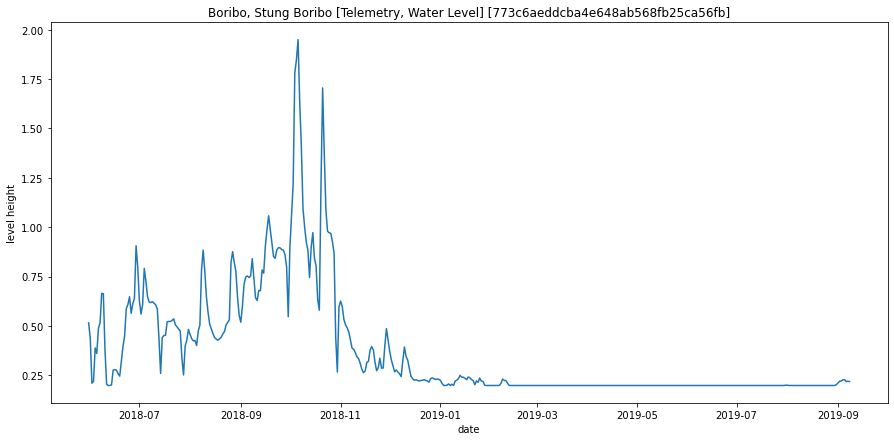

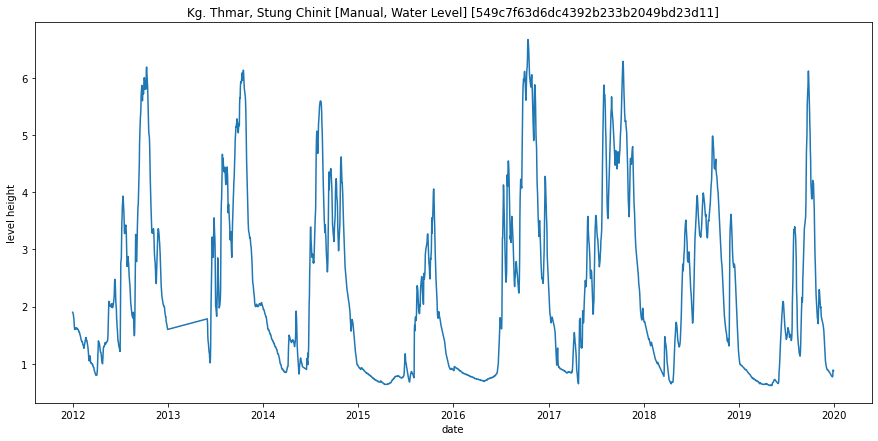

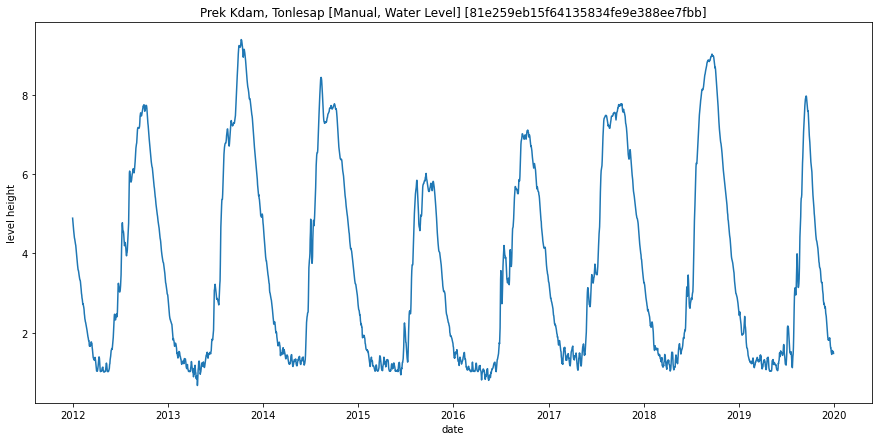

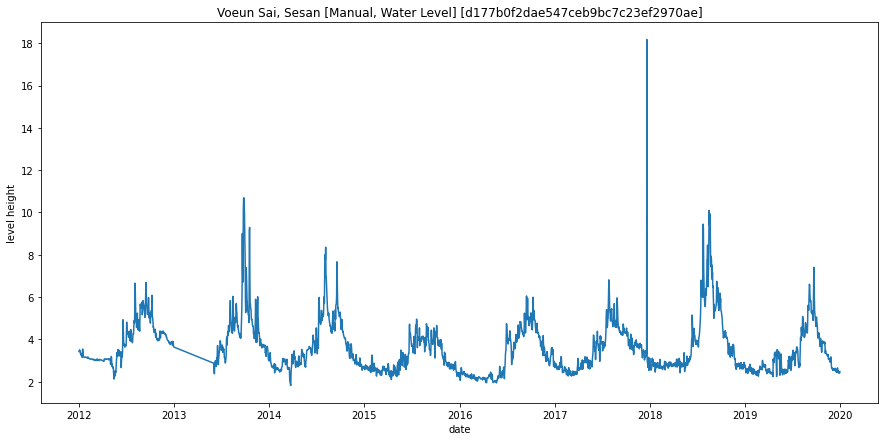

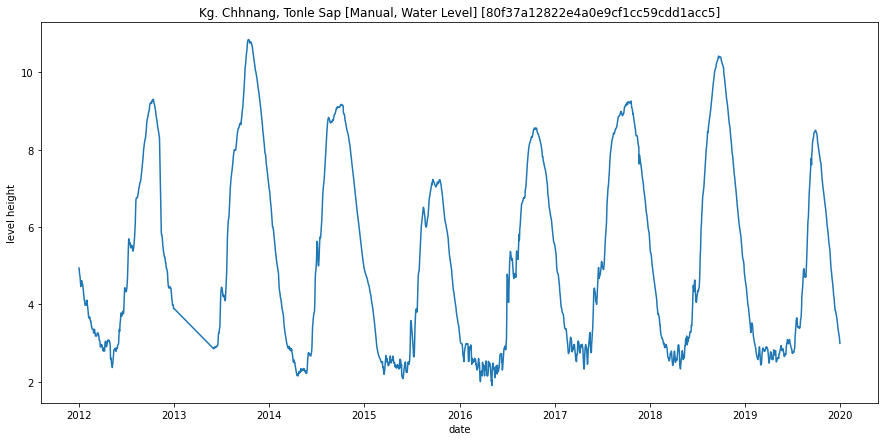

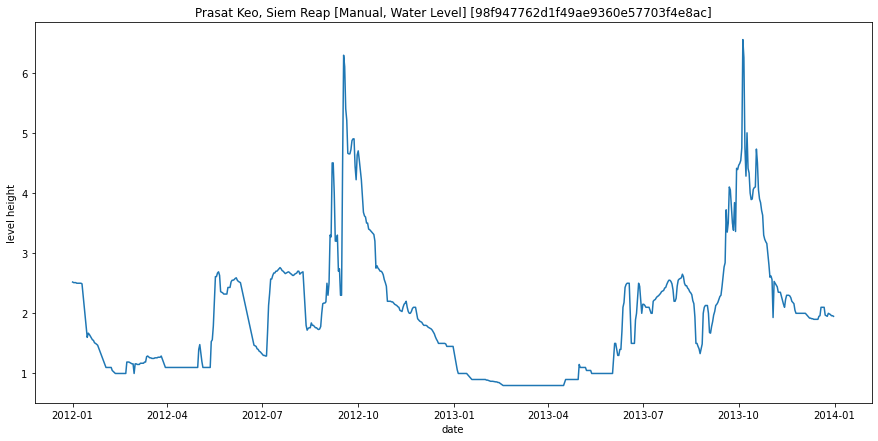

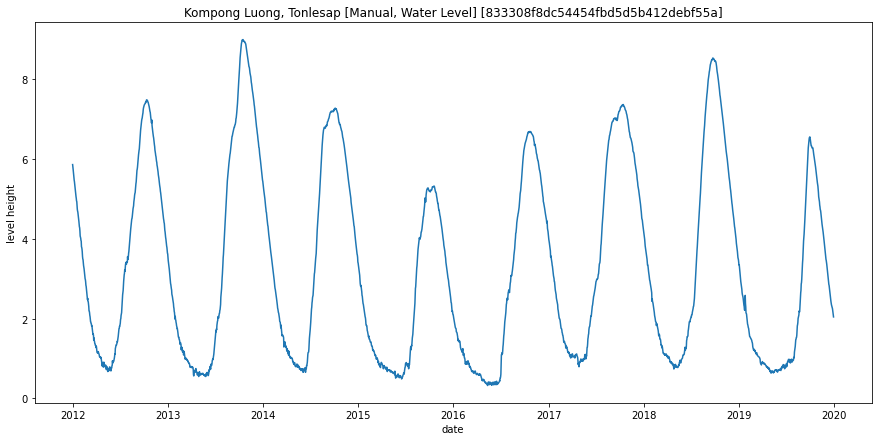

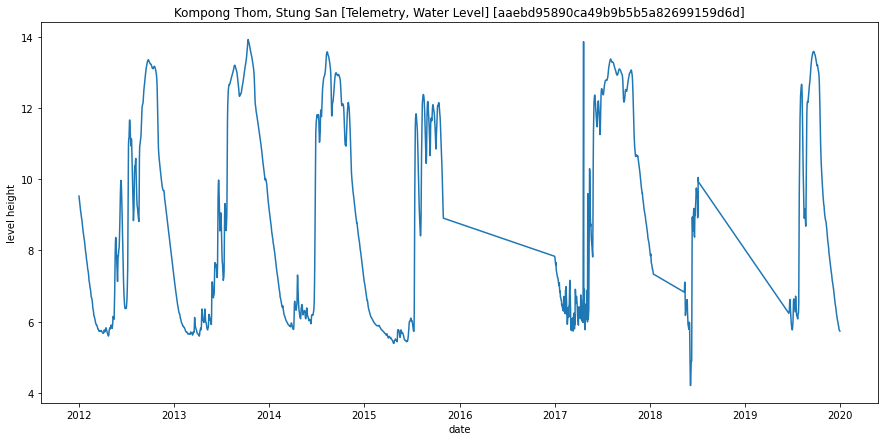

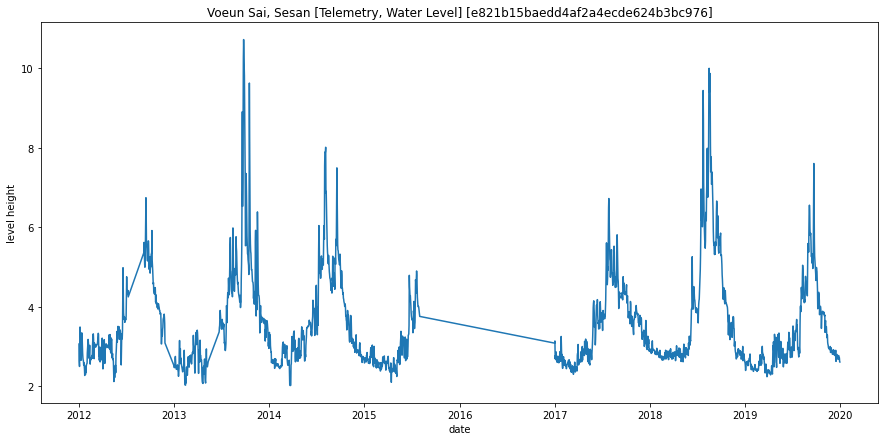

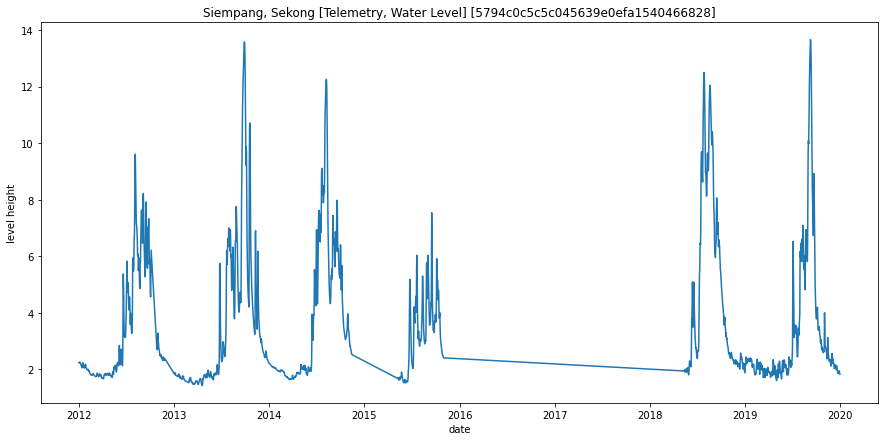

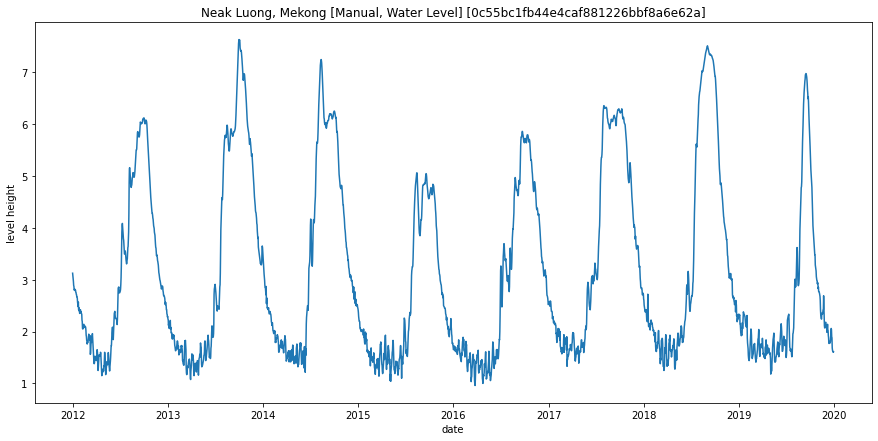

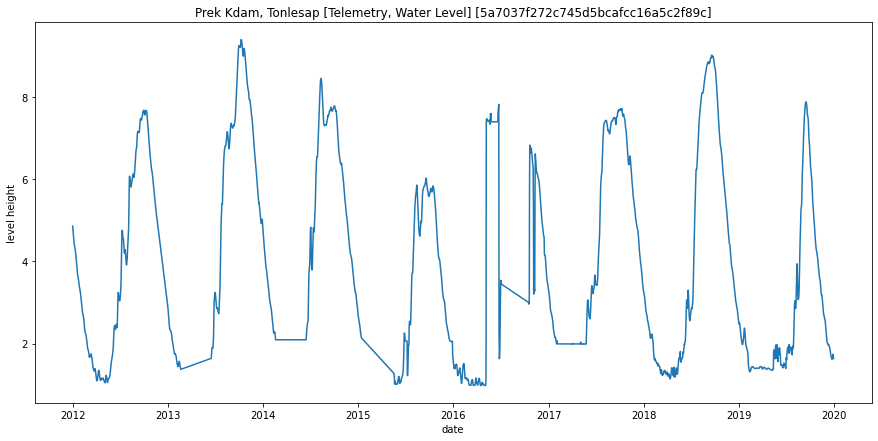

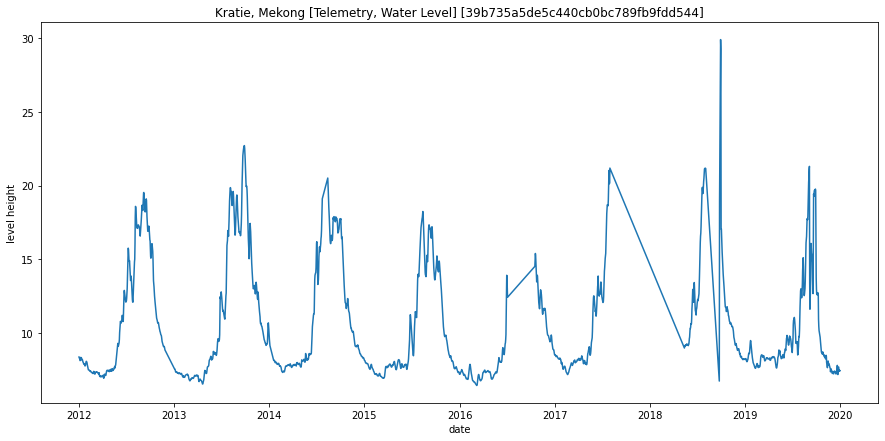

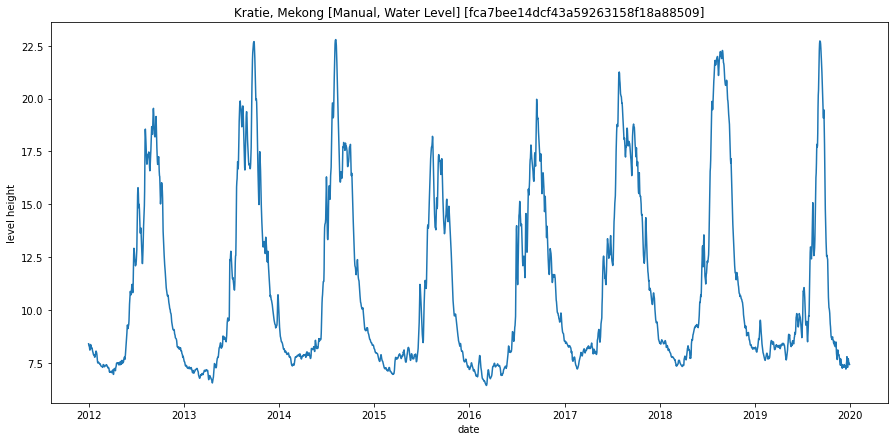

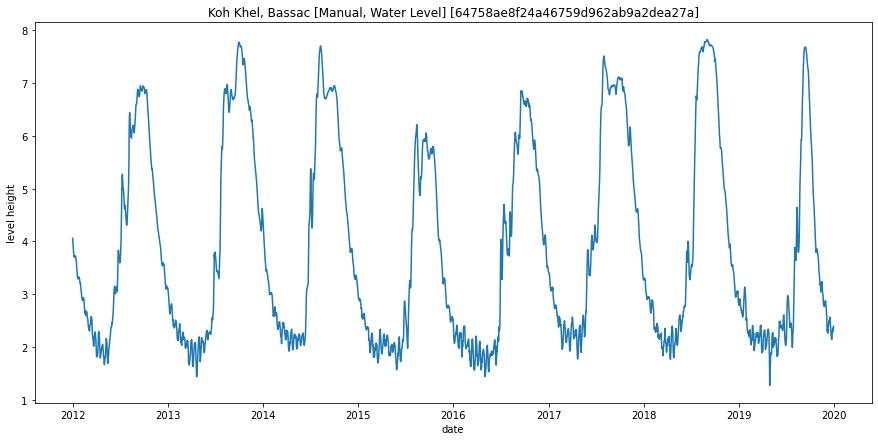

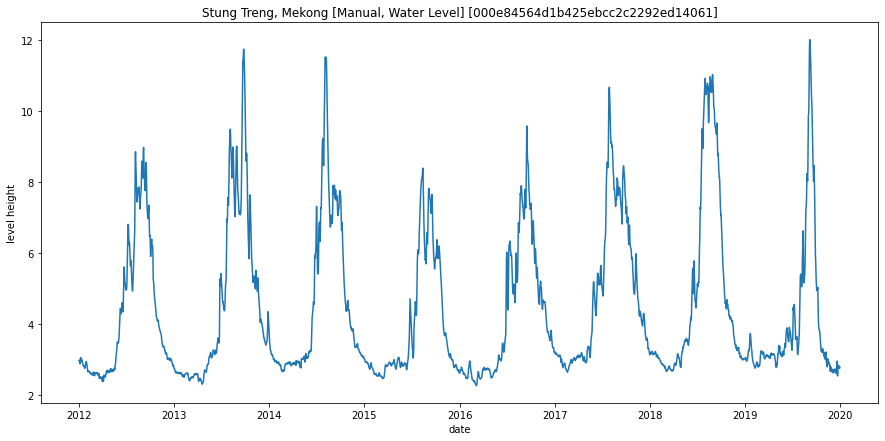

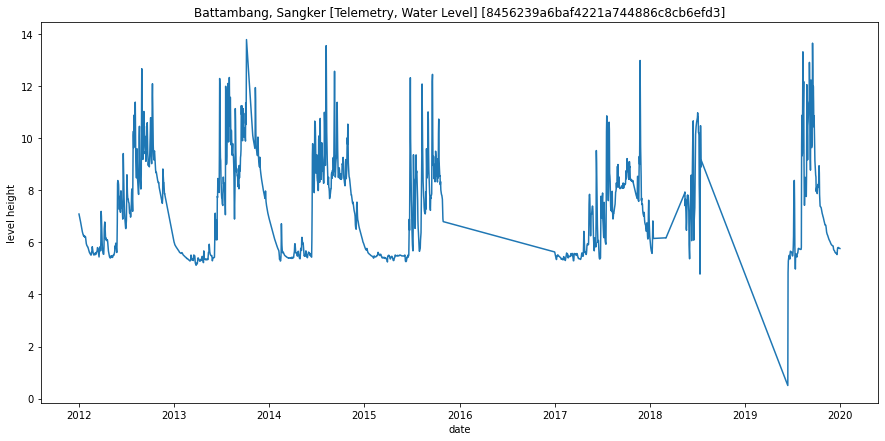

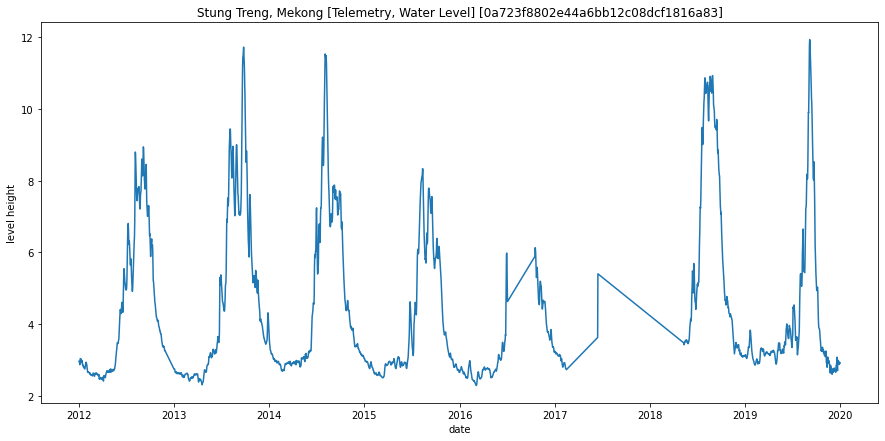

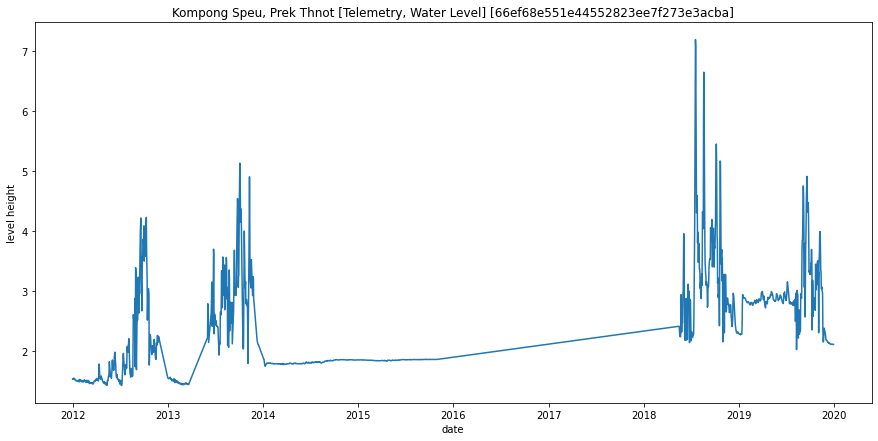

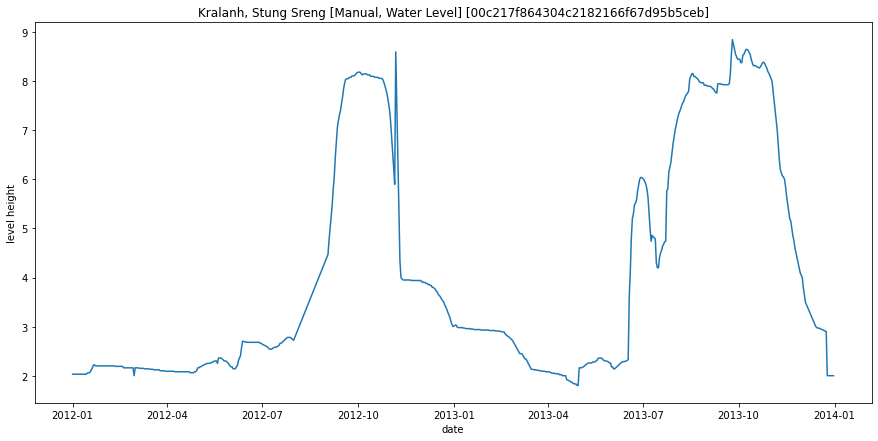

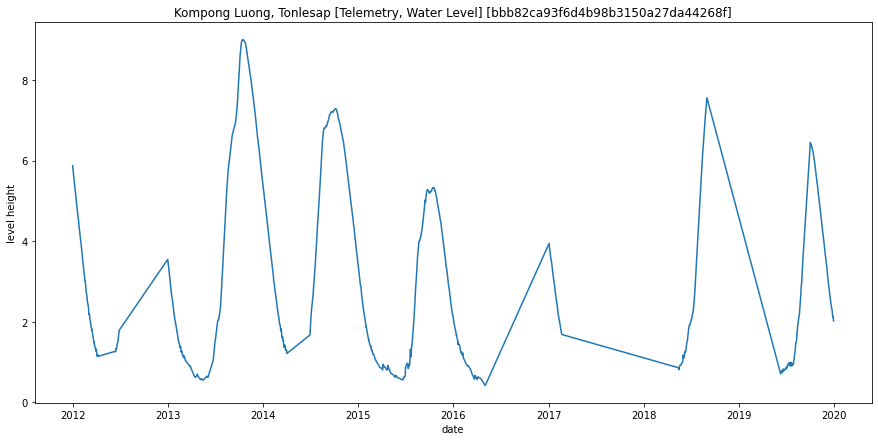

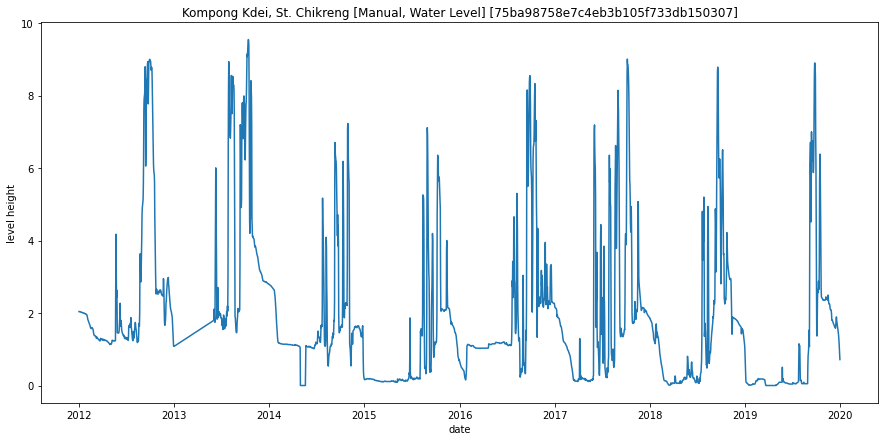

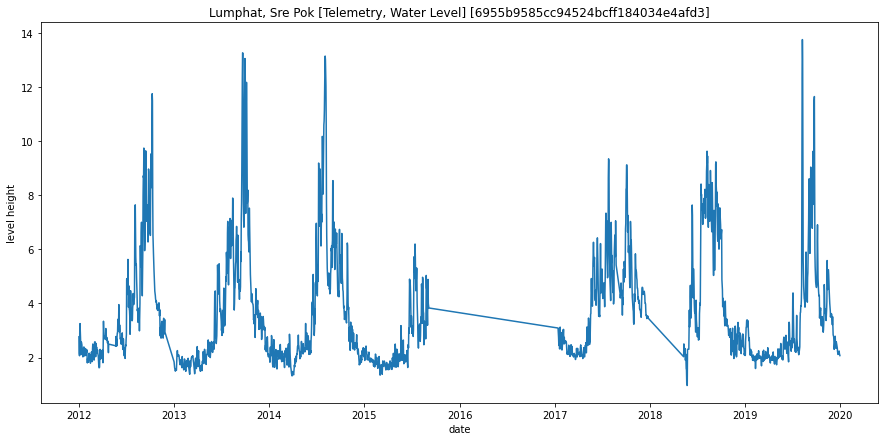

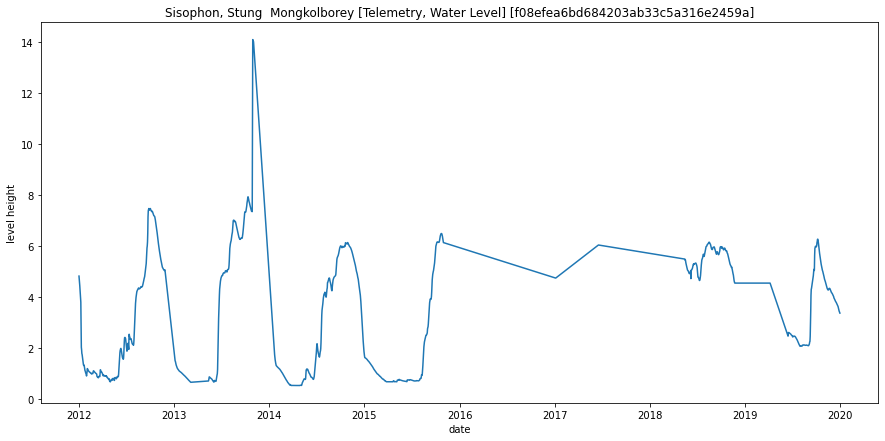

In [29]:
Path(f'{BASE_DIR}/plot_exports').mkdir(parents=True, exist_ok=True)

initial_stations = []
for station in all_stations_list:
    filtered_df = level_obs.loc[(level_obs['uniqueid'] == station)]
    averaged_df = filtered_df.groupby(filtered_df.datetime.dt.date).mean()
    if len(averaged_df) > 0.15 * num_days:
#     if len(averaged_df) > 1:
        initial_stations.append(station)
        averaged_df['uniqueid'] = station
        averaged_df['datetime'] = averaged_df.index
        fig, axs = plt.subplots(figsize=(15, 7))
        station_name = all_stations.loc[(all_stations['uniqueid'] == station)]['stationname'].unique()[0]
        river_name = all_stations.loc[(all_stations['uniqueid'] == station)]['river'].unique()[0]
        parameter = all_stations.loc[(all_stations['uniqueid'] == station)]['parameter'].unique()[0]
        label = all_stations.loc[(all_stations['uniqueid'] == station)]['label'].unique()[0]
        axs.set_title(f'{station_name}, {river_name} [{label}, {parameter}] [{station}]')
        axs.set_xlabel('date')
        axs.set_ylabel('level height')
        axs.plot(averaged_df['datetime'], averaged_df['value'])
        fig.savefig(f'{BASE_DIR}/plot_exports/{station}')

In [30]:
len(initial_stations)

32

In [31]:
removed_stations = np.setdiff1d(all_stations_list, initial_stations)
len(removed_stations)

18

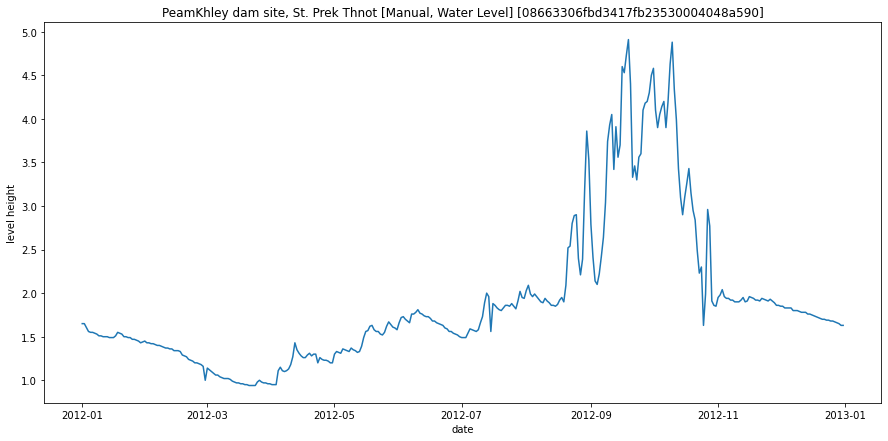

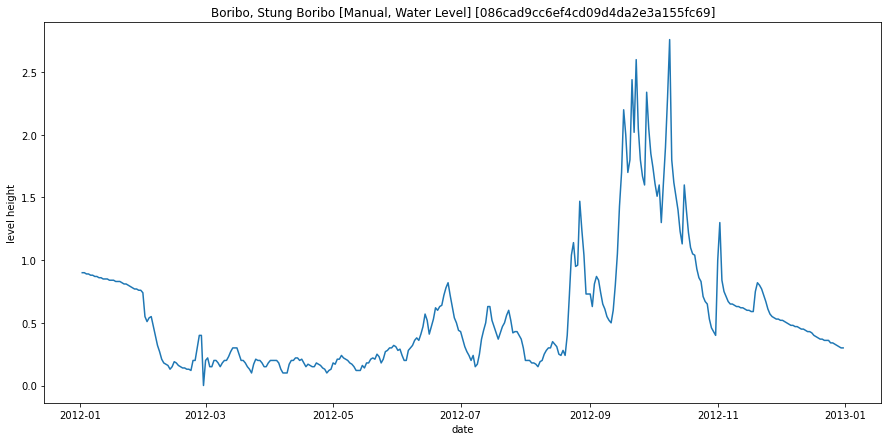

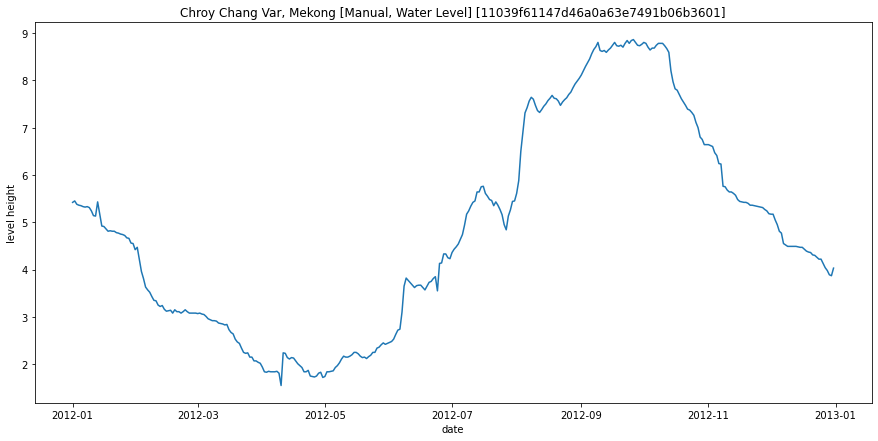

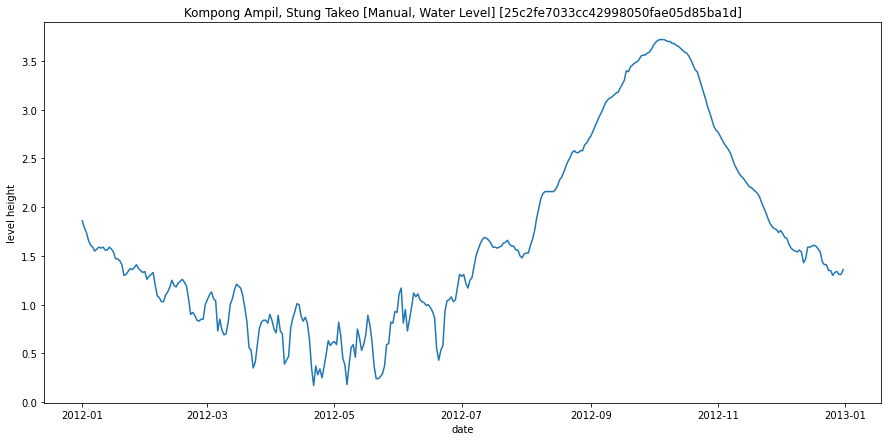

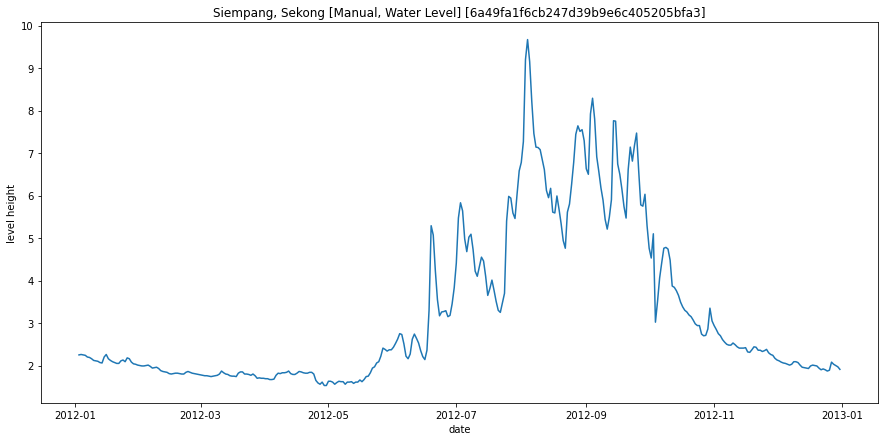

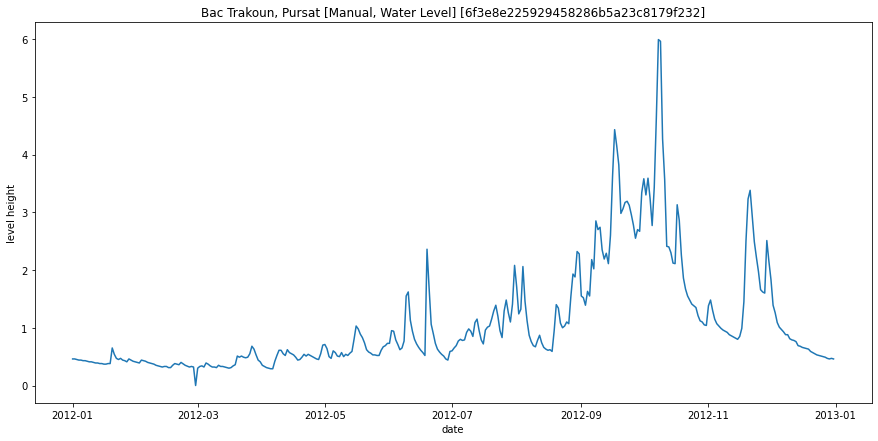

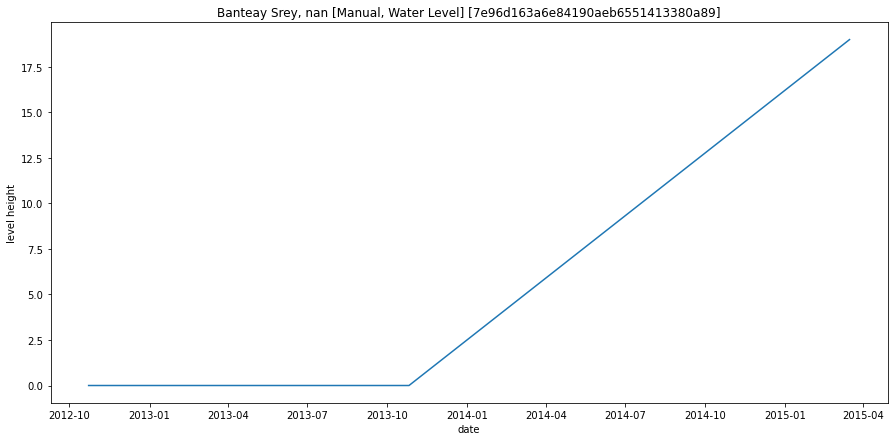

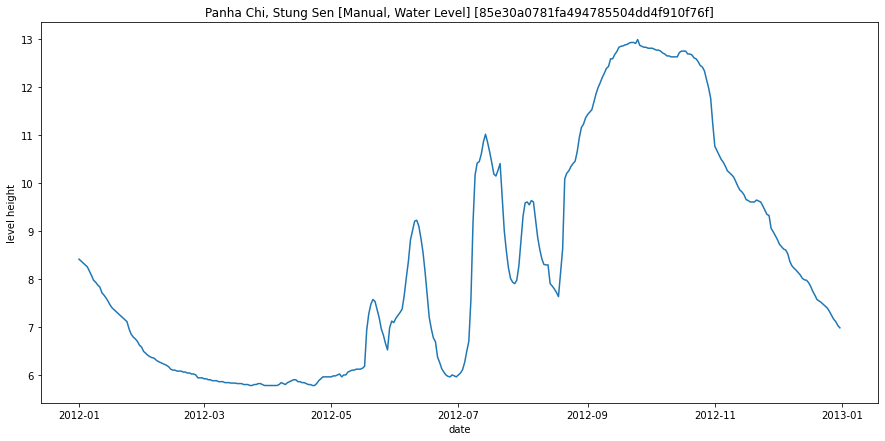

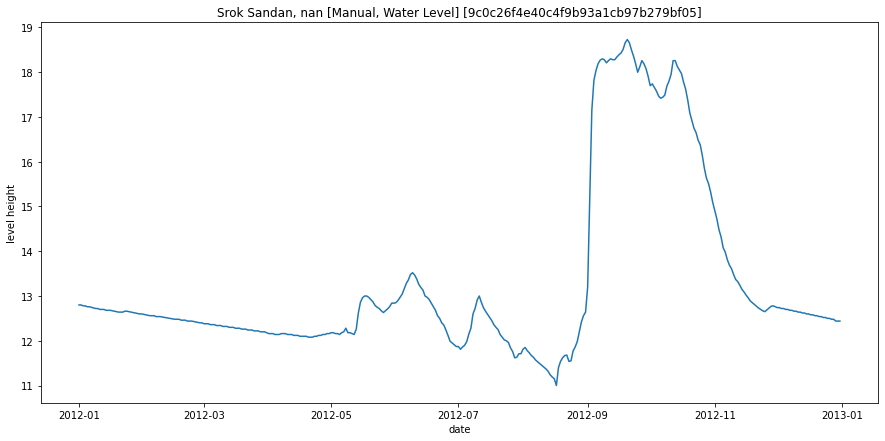

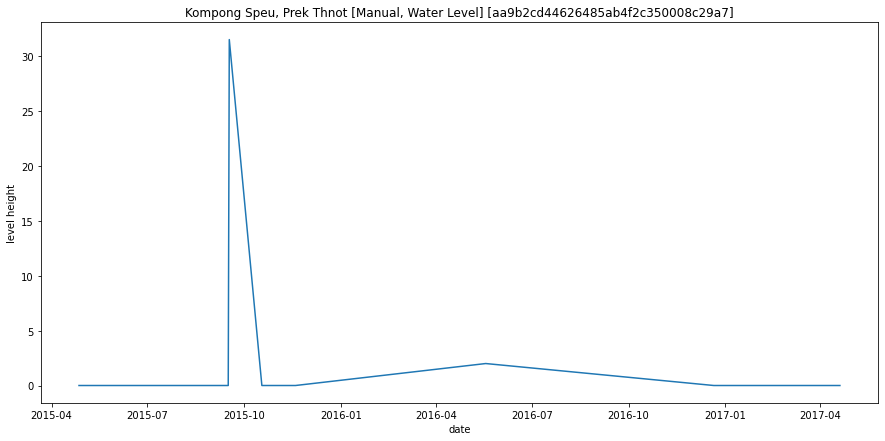

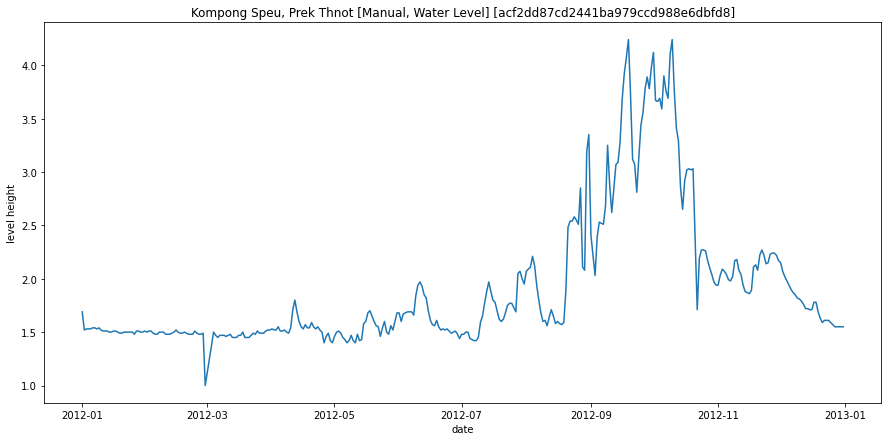

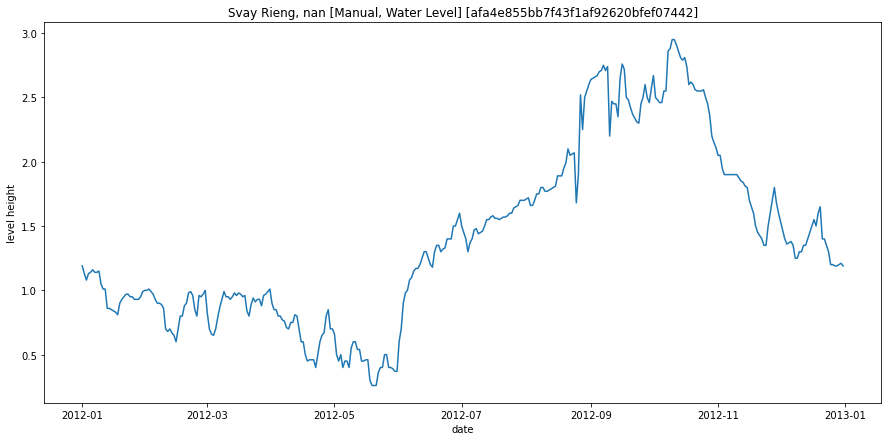

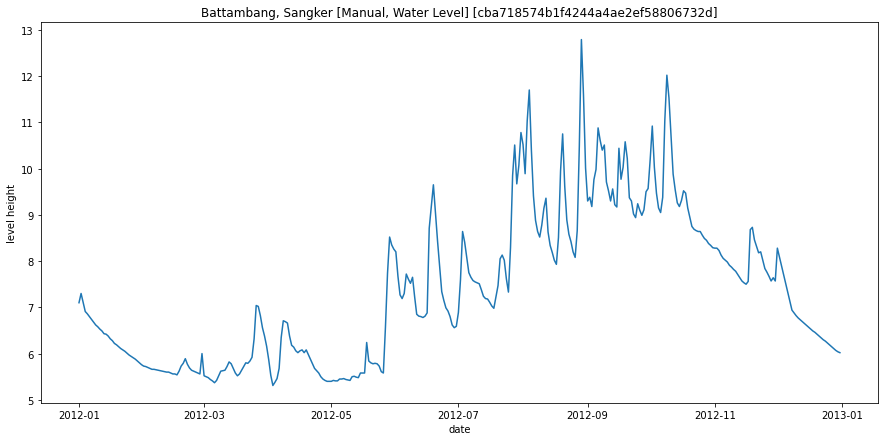

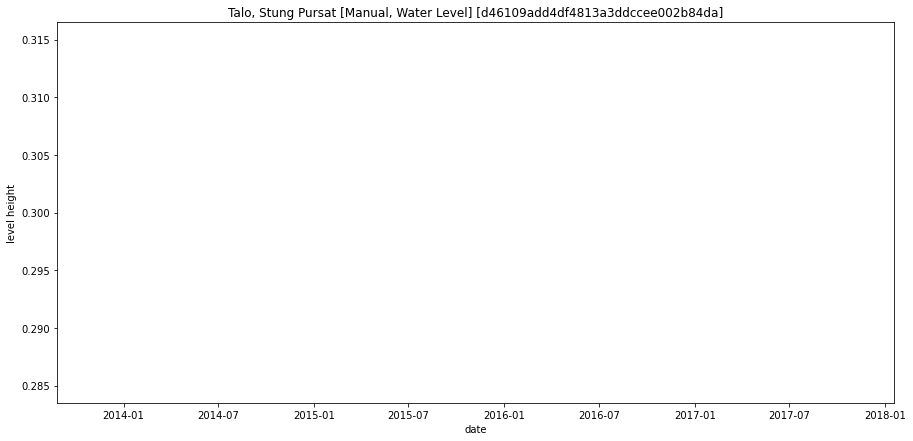

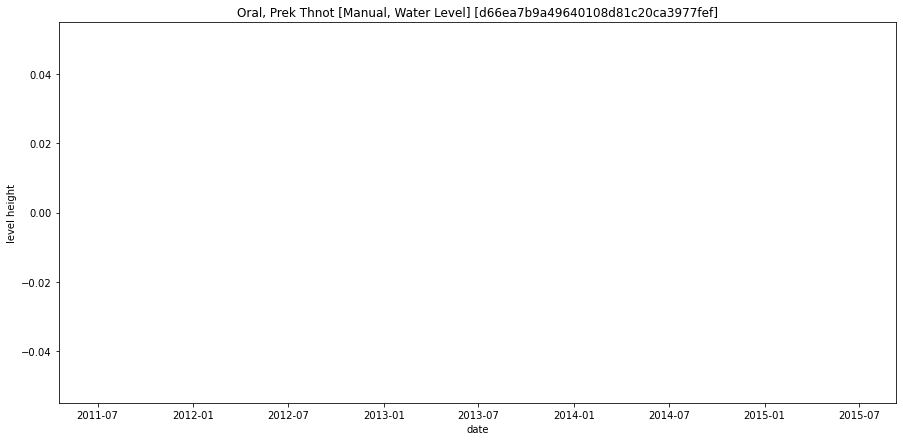

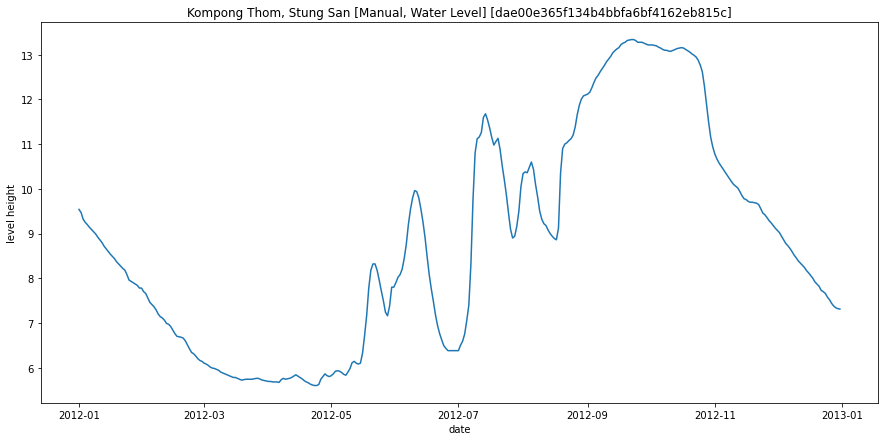

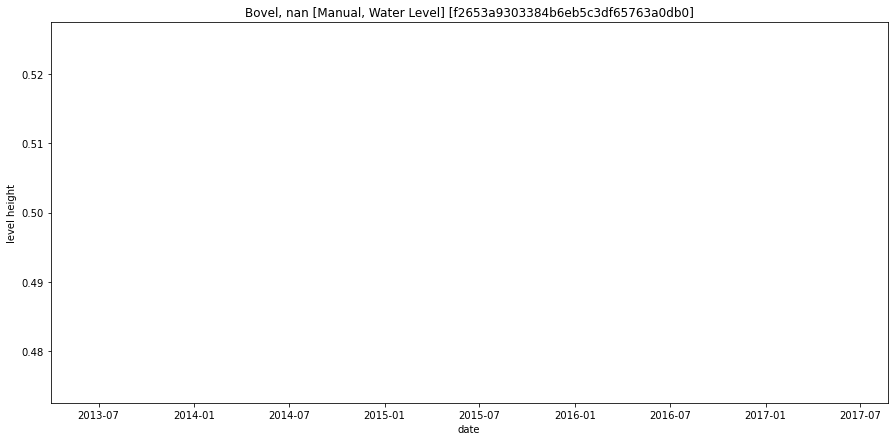

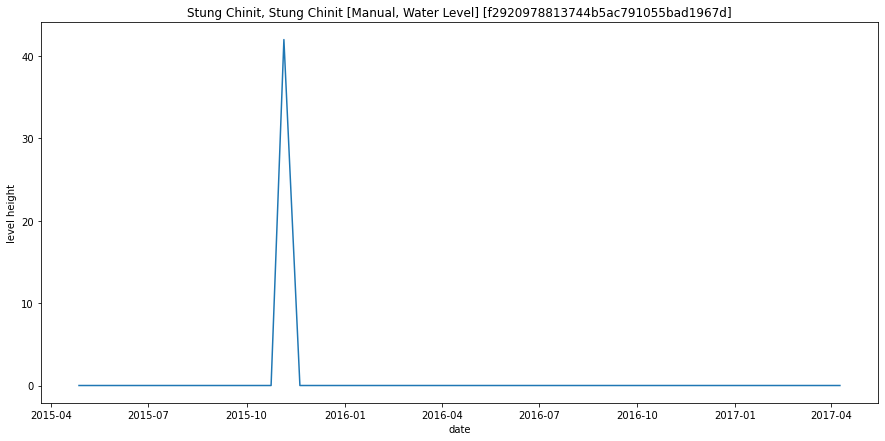

In [32]:
for station in removed_stations:
    filtered_df = level_obs.loc[(level_obs['uniqueid'] == station)]
    averaged_df = filtered_df.groupby(filtered_df.datetime.dt.date).mean()
    averaged_df['uniqueid'] = station
    averaged_df['datetime'] = averaged_df.index
    fig, axs = plt.subplots(figsize=(15, 7))
    station_name = all_stations.loc[(all_stations['uniqueid'] == station)]['stationname'].unique()[0]
    river_name = all_stations.loc[(all_stations['uniqueid'] == station)]['river'].unique()[0]
    parameter = all_stations.loc[(all_stations['uniqueid'] == station)]['parameter'].unique()[0]
    label = all_stations.loc[(all_stations['uniqueid'] == station)]['label'].unique()[0]
    axs.set_title(f'{station_name}, {river_name} [{label}, {parameter}] [{station}]')
    axs.set_xlabel('date')
    axs.set_ylabel('level height')
    axs.plot(averaged_df['datetime'], averaged_df['value'])

In [33]:
# stations with data gap after inspecting the hydrograph
data_gap_stations = [
    '00c217f864304c2182166f67d95b5ceb', '7be67bafcf9d4233b5ca883857273e1a', '98f947762d1f49ae9360e57703f4e8ac',
    '773c6aeddcba4e648ab568fb25ca56fb', '9819df92c2264effa3b5a416e49eb1df', '66ef68e551e44552823ee7f273e3acba'
]

len(data_gap_stations)

6

In [34]:
final_stations = np.setdiff1d(initial_stations, data_gap_stations)
final_stations_df = df_mrc_station[df_mrc_station.uniqueid.isin(final_stations)]
# final_stations_df = pd.concat([final_stations_df, discharge_o_df])
final_stations_df.head()

,rid,uniqueid,identifier,locationidentifier,country,countrycode,stationname,stationcode,parameter,label,...,interval,utcoffset,correctedstarttime,starttime,correctedendtime,endtime,river,stationshortname,latitude,longitude
3,28,2c070f6a900b41e7ad19bafef374f52d,Water Level.Telemetry@KH_033401_[Chaktomuk],KH_033401_[Chaktomuk],Cambodia,KH,Chaktomuk,033401,Water Level,Telemetry,...,15 minutes,7,2008-08-01 14:15:00,20080801,2021-03-19 05:30:00,20210319,Bassac,NaN,11.562990,104.935287
37,171,93337ffe7838467289bf5b55401ee6f8,Water Level.Manual@KH_450101_[Lumphat],KH_450101_[Lumphat],Cambodia,KH,Lumphat,450101,Water Level,Manual,...,1-6 times p/day,7,1965-01-01 00:00:00,19650101,2021-03-15 00:00:00,20210315,Sre Pok,NaN,13.500880,106.971153
40,179,b5da800e9c8e4346a3b8d9d6daa73e0a,Water Level.Manual@KH_019802_[Kompong Cham],KH_019802_[Kompong Cham],Cambodia,KH,Kompong Cham,019802,Water Level,Manual,...,1-6 times p/day,7,1930-01-01 00:00:00,19300101,2021-03-15 00:00:00,20210315,Mekong,NaN,11.910986,105.384102
158,13,cd94408bcf944bc88033cf05675034fd,Water Level.Manual@KH_020101_[Phnom Penh Port],KH_020101_[Phnom Penh Port],Cambodia,KH,Phnom Penh Port,020101,Water Level,Manual,...,1-6 times p/day,7,1960-01-01 00:00:00,19600101,2021-03-15 00:00:00,20210315,Tonle Sap,NaN,11.577020,105.919038
216,17,53359074bfcf4961866daac9fbee8292,Water Level.Manual@KH_600101_[Kompong Chen],KH_600101_[Kompong Chen],Cambodia,KH,Kompong Chen,600101,Water Level,Manual,...,1-6 times p/day,7,1962-04-01 00:00:00,19620401,2021-03-15 00:00:00,20210315,Stung Staung,NaN,12.938906,105.579061


In [35]:
Path(f'{BASE_DIR}/other_exports').mkdir(parents=True, exist_ok=True)

# save final stations
final_stations_df.to_csv(f'{BASE_DIR}/other_exports/2012_2019_stations.csv', sep=',', encoding='utf-8')

discharge_o_df.to_csv(f'{BASE_DIR}/other_exports/discharge_only_stations.csv', sep=',', encoding='utf-8')